# Differential equations 4: Boundary Value Problems

*  last two homeworks are not compulsory but similar things will be at final exam

### Dictionary:
* boundary - límite, frontera (
The mountains mark the boundary between the two continents)
* combine - combinar, unir
* unlike - diferente a, contrario (Unlike you, I'm not a great dancer.)
* residuals - residual
* launch - lanzar (The launch of the rocket was delayed for 24 hours because of bad weather.)
* avoid - evitar
* obstacle - obstáculo

### Order of the class
* a bit more on the differential equations - nomenclature, conversion
* Boundary value problem - Two Point Boundary Problem
* word about a method called "shooting method" 
* `scipy.integrate.solve_bvp` (syntax similar to: `scipy.integrate.solve_ivp`)
* Example 1 - launching a rocket vertically $\frac{d^2y}{dt^2}$
* Example 2 - obstacle avoidance $\frac{d^2y}{dx^2}$

### Differential equations - notation:

* if $y^{\prime}$ - first derivative over space $\frac{dy}{dx}$
* if $y^{\prime \prime}$ - second derivative over space $\frac{d^2y}{dx^2}$

* if $\dot y$ - first derivative over time $\frac{dy}{dt}$
* if $\ddot y$ - second derivative over time $\frac{d^2y}{dt^2}$


### Simplyfing second order differential equation. Lets take an example

$$
\begin{align*} 
\frac{d^2y}{dt^2} &= t-y 
\end{align*} 
$$


So we know that the second derivative is equal to $t-y$. But the first derivative must be equal to something too! Must be equal to some function, I dont know, $z$...


$$
\begin{align*} 
\frac{dy}{dt} &= z 
\end{align*} 
$$

Then if I take the derivative of my new function $z$

$$
\begin{align*} 
\frac{d} {dt} \left( z \right) &\equiv \frac{d}{dt} \left( \frac{dy}{dt} \right) = t-y 
\end{align*} 
$$

$$
\begin{align*} 
\frac{dz} {dt} &=  t-y 
\end{align*} 
$$


then I can have a set of first order differential equations:

$$
\begin{align*} 
\frac{dy}{dt} &= z \\
\frac{dz}{dt} &= t-y
\end{align*} 
$$

* and this can be already solved as a coupled differential equations! (as we have seen before)
* we can rewrite it to make it easier to implement it numerically using vectors: Here we have two dependent variables $y$ and $z$ which we can represent as elements of some vector: 
  now $y=y[0]$, $z=y[1]$ and $dydx$ is vector of results of the RHS (Right Hand Side of this set of equations)
 * dydx[0] - result of the first equation
 * dydx[1] - result of the second equation

$$
\begin{align*} 
dydx[0] &= y[1] \\
dydx[1] &= t-y[0]
\end{align*} 
$$

* why do I use this notation... bacause of rk4.f90


### Difference between IVP and BVP
* If all the conditions are provided at the same point, the problem is said to be an Inıtial Value Problem (IVP).

* If all the conditions are not provided at the same point, the problem is said to be a Boundary Value problem (BVP).


# Two-Point Boundary Value Problems
* some more theory

Up to now we have solved initial value problems of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Second order equations can be similarly planted as 

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y'(a) = u $$

This type of systems can be readily solved by defining the auxiliar variable $w = y'$, turning it into a first order system of equations.

Now, we shall solve two-point boundary problem, where we have two conditions on the solution $y(t)$ instead of having the function and its derivative at some initial point, i.e.

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y(b) = \beta $$

In spite of its similar form to the initial value problem, two-point boundary problems pose a increased difficulty for numerical methods. The main reason of this is the iterative procedure performed by numerical approaches, where from an initial point, further points are found. Trying to fit two different values at different points implies then a continuous readjusting of the solution.



A common way to solve these problems is by turning them into a initial-value problem

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y'(a) = u $$

Let's suppose some choice of $u$, integrating by using some of the previous methods, we obtain the final boundary condition $y(b)=\theta$. If the produced value is not the one we wanted from our initial problem, we try another value $u$. This can be repeated until we get a reasonable approach to $y(b)=\beta$. This method works fine, but it is so expensive and terribly inefficient.

Note when we change $u$, the final boundary value also change, so we can assume $y(b) = \theta$. The solution to the problem can be thought then as a root-finding problem:

$$ y(b) = \theta(u) = \beta $$

or

$ r(u) \equiv \theta(u) - \beta = 0 $

where $r(u)$ is the residual function. This problem can be thus solved using some of the methods previously seen for the root-finding problem.

## A word about shooting method (if someone asks...)
* a method (a bit like a brute-force) to solve BVP problem
* relies on guessing a value of a function (undershooting) comparing to the expected value and overshooting - then using a interpolation method to find the value inbetween... example

<img src="imgs/shooting_method.png" width="800" />

So this is a boundary value problem!

## Using scipy.integrate.solve_bvp to solve Boundary Value Problem

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

## Example 1
- Launching a rocket 

<img src="imgs/rocket_launch.jpg" width="400" />

We are going out to launch a rocket vertically, and let $y(t)$ be the altitude (meters from the surface) of the rocket at time $t$. We know the gravity g=9.8m/s2

If we want to have the rocket at $50$ meters off the ground after $3$ seconds after launching, what should be the velocity at launching? (recall that velocity dy/dt )

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is (Newton law):

$$\ddot y= −g $$

so the above is exactly the same as:

$$\frac{d^2y}{dt^2}= −g $$


with the two boundary conditions are: 

y(0)=0

and y(3)=50. 

* And we want to answer the question, what’s the $\dot y$(0) at the launching? $\frac{dy}{dt}$

## Solution

$$\frac{d^2y}{dt^2}= −g $$


First, we will reduce the order of the function, the second-order ODE becomes:

$$
\begin{align*} 
\frac{dy}{dt}&=v \\
\frac{dv}{dt}&=−g
\end{align*} 
$$

* we have two dependent variables $y$ and $v$ which we can represent as elements of some vector: now $y=y[0]$, $v=y[1]$ 

$$
\begin{align*} 
dydt[0]&=y[1] \\
dydt[1]&=-g \\
\end{align*} 
$$

with the two boundary conditions are: 

y(0)=0

and y(3)=50. 


## The implementation of this BVP:
* scipy.integrate.solve_bvp (before was scipy.integrate.solve_ivp)
* its a bit more complicated than scipy.integrate.solve_ivp
* solve_bvp: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html
* scipy.integrate.solve_bvp(fun, bc, x, y0... rest is optional
* scipy.integrate.solve_bvp(derivs, bc, x, y0... rest is optional

### Step by step:


**1.** define the vectorized derivs funcion: derivs(y,x)

* unlike the ivp_solve here t is a vector and y is an array!

**2.** define the boundary condition function: bc(ya,yb)
  *  bc: boundary conditions:
  *  what are ya and yb:
  *  ya and yb are two vectors 
    * ya is vector of initial values (position and velocity)
    * yb is vector of final values (position and velocity)
  
  *  ya is a vector of two elements 
  *  The info of the initial position is stored in ya[0]
  *  The info of the initial derivative (velocity) is stored in ya[1]

  *  yb is also a vector of two elements        
  *  The info of the final position is stored in yb[0]
  *  The info of the final derivative is stored in yb[1]
  
  * ya stores initial values (position/derivative)
  * yb stores final values  (position/derivative)
  
     ya stores INITIAL VALUES OF THE y and y'
     * $ya[0] = y_{ini}$
     * $ya[1] = y_{ini}^{\prime}$

     yb stores FINAL VALUES OF THE y and y'
     * $yb[0] = y_{fin}$
     * $yb[1] = y_{fin}^{\prime}$

  So for example if we want to implement the condition y(3)=50
     we have to look at yb[0] (final position, NOT derivative)
     
     
  *  The implementation of the condition is simple: we define another vector called $residuals$ which will contain two elements, because we have two conditions and we say:

     * residuals[0]= yb[0]-50.0 (here we look at final position of the rocket and make sure that if we subtract from it 50.0 the results is zero - meaning no residuals)
     
     * residuals[1]= ya[0]-0.0  (here we look at initial position of the rocket and make sure that if we subtract from it 0.0 the results is zero - meaning no residuals)
     
     
  * (5-4=1, so 1 is a residual of subtraction of 4 from 5 - big residual 
  
     5-4.9=0.1 so 0.1 is a smaller residual of subtraction of 4.9 from 5)
     
     
  * so: solve_bvp will try to find such set of parameters that both elements of the residuals are zero (a bit like minimization problem) 
    
    *residuals[0]=0
    
    *residuals[1]=0

**3.** define space (or time domain) 
  * t_steps = 100
  * t = np.linspace(0,3,t_steps) ### 'mesh'
  
**4.** initialize y0 array:
  * give an initial guess of $y0$ let say $1$ 
  * the size of the initial guess $y0$ is different than for IVP
  * the shape is like combined two vectors (because we have two equations) with t_steps each
    * remember, this is not an initial value problem but boundary problems (so we have a mesh of points)
  * so its an array of 2 rows x columns of lenght t_steps:
  * y0 = np.ones((2,t_steps))
  * y0 shape here would be (2,100)

**5.** call the scipy.integrate.solve_bvp
  * sol = solve_bvp(derivs, bc, t, y0)

In [1]:
import numpy as np
t_steps = 100
y = np.ones((2,t_steps))
y = np.zeros((2,t_steps))
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

#### Lets recall the problem:

First, we will reduce the order of the function, the second-order ODE becomes:

$$
\begin{align*} 
\frac{dy}{dt}&=v \\
\frac{dv}{dt}&=−g
\end{align*} 
$$

* we have two dependent variables $y$ and $v$ which we can represent as elements of some vector: now $y=y[0]$, $v=y[1]$ 

$$
\begin{align*} 
dydt[0]&=y[1] \\
dydt[1]&=-g \\
\end{align*} 
$$

with the two boundary conditions are: 

we want that the altitude is initially $0$ m and after $3$ seconds  is 50 meters. y(0)=0, y(3)=50 
##### do not confuse the brackets y(0) is not  y[0]!!!!
* y(0) is the initial value of the altitute (hence position hence we must set ya)
* y[0] is the first element of the vector representing the altitute in the set of equations y[1] is velocity



In [2]:
from scipy.integrate import solve_bvp
import numpy as np

def derivs(t,y):
    dydt=np.zeros((y.shape))
    dydt[0]=y[0]
    dydt[1]=-9.81
    return dydt

def bc(ya,yb):
    residuals=np.array([0.0,0.0])
    residuals[0]=ya[0] - 0.0
    residuals[1]=yb[0] - 50.0
    print(ya[1])
#    print(residuals)
    return residuals

# give the time domain
t_steps = 100
t = np.linspace(0,3,t_steps)

# give an initial guess
# the size of the initial guess is different than for IVP
# we pass two vectors  (because we have two equations) with t_steps each
# but we combine it into one array of 2 rows t columns:


# we must initialize the system
# it can be anything! (usually 1 or 0) We do not initialize intial conditions here, we initialize 
# it is only to reserve some space for the y vector evolution

y = np.zeros((2,t_steps))
y = np.ones((2,t_steps))
print(y.shape)
# solve the system

(2, 100)


In [3]:
sol = solve_bvp(derivs, bc, t, y)

1.0
1.0
1.0
1.0000000298023224
1.0
1.0
1.0


#### the whole vector (mesh or 100) y evolves at the same time !!!!!
#### the method is trying to minimize the error and so that the whole two row vector of position and velocity fulfils the initial and final position and velocity

In [4]:
# Those printed values are the initial velocities found iteratively:

In [5]:
# y stores solution of two things
## evolution of the postion
## evolution of the velocity
sol.y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [6]:
sol.y[1][-1]

1.0

-1.6666666666666667
1.0


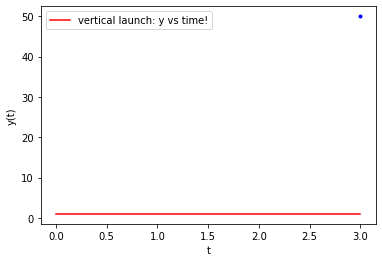

In [7]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1)
ax.plot(sol.x, sol.y[0],'-r',label='vertical launch: y vs time!')
ax.plot(3,50,'.b')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()
print(-5/3)
print(sol.y[0][-1])

## Homework
Using scipy.integrate.solve_bvp solve the problem presented in the shooting method section:

<img src="imgs/shooting_method.png" width="800" />